In [27]:
import sf_quant.data as sfd
import polars as pl
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [28]:
start = dt.date(1995, 6, 30)
end = dt.date(2025, 9, 15)

In [29]:
weights = pl.read_parquet("../signal_weights.parquet")

weights

date,barrid,bab_weight,meanrev_weight,momentum_weight
date,str,f64,f64,f64
1995-06-30,"""USAA191""",-1.0844e-20,null,null
1995-06-30,"""USAA1W1""",-9.1201e-22,null,null
1995-06-30,"""USAA1Y1""",-4.8273e-21,null,null
1995-06-30,"""USAA2L1""",-4.2673e-21,null,null
1995-06-30,"""USAA311""",-9.2198e-21,null,null
…,…,…,…,…
2025-09-15,"""USBQZR1""",-6.9890e-22,-1.3553e-20,null
2025-09-15,"""USBRGT1""",-3.7165e-21,-3.4045e-19,null
2025-09-15,"""USBRH21""",-2.6956e-21,-9.9263e-20,null


In [61]:
# Equal weight our signals

eqWt = weights.with_columns(
    (
        (
            pl.col("bab_weight") +
            pl.col("meanrev_weight") +
            pl.col("momentum_weight")
        ) / 3
    ).alias("equal_weight")
)

eqWt

date,barrid,bab_weight,meanrev_weight,momentum_weight,equal_weight
date,str,f64,f64,f64,f64
1995-06-30,"""USAA191""",-1.0844e-20,null,null,null
1995-06-30,"""USAA1W1""",-9.1201e-22,null,null,null
1995-06-30,"""USAA1Y1""",-4.8273e-21,null,null,null
1995-06-30,"""USAA2L1""",-4.2673e-21,null,null,null
1995-06-30,"""USAA311""",-9.2198e-21,null,null,null
…,…,…,…,…,…
2025-09-15,"""USBQZR1""",-6.9890e-22,-1.3553e-20,null,null
2025-09-15,"""USBRGT1""",-3.7165e-21,-3.4045e-19,null,null
2025-09-15,"""USBRH21""",-2.6956e-21,-9.9263e-20,null,null


In [51]:
columns = ["date", "barrid", "fwd_return"]
returns = sfd.load_assets(start=start, end=end, in_universe=True, columns=columns)

returns

date,barrid,fwd_return
date,str,f64
2013-07-31,"""USA06Z1""",0.9585
2013-08-01,"""USA06Z1""",-0.1582
2013-08-02,"""USA06Z1""",2.2187
2013-08-05,"""USA06Z1""",-2.4806
2013-08-06,"""USA06Z1""",-8.1081
…,…,…
2025-09-09,"""USBRKA2""",0.0414
2025-09-10,"""USBRKA2""",2.2351
2025-09-11,"""USBRKA2""",-2.3752


In [62]:
eqWtReturn = (
    eqWt.join(returns, on=["date", "barrid"], how="left")
    .with_columns(
        (pl.col("fwd_return") / 100)
    )
    .group_by("date")
    .agg(
        (pl.col("fwd_return") * pl.col("equal_weight")).sum().alias("eqWtRet")
    )
    .sort("date")
)

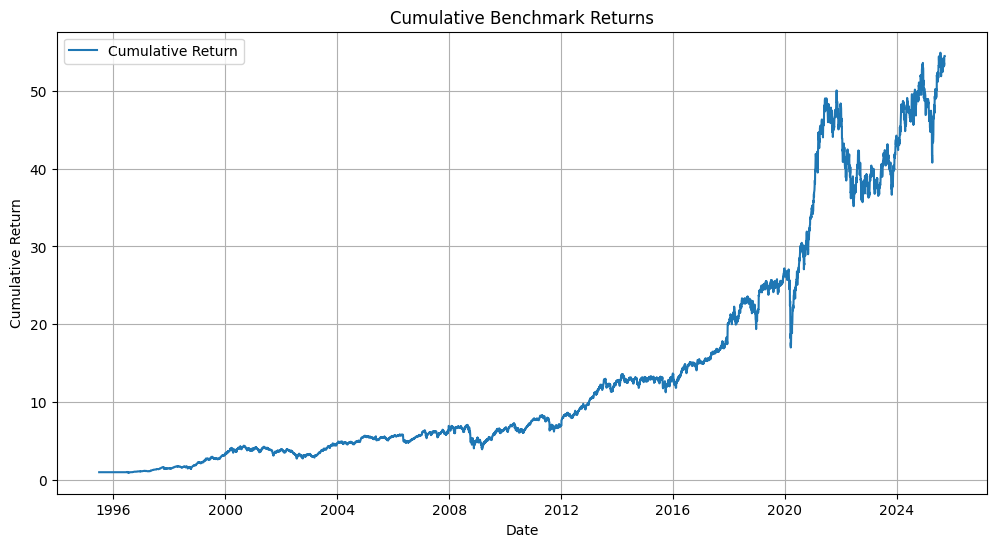

In [63]:
# Calculate cumulative returns
cumeqWtRet = eqWtReturn.with_columns(
    (1 + pl.col("eqWtRet")).cum_prod().alias("cumulative_return")
)

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumeqWtRet["date"], cumeqWtRet["cumulative_return"], label="Cumulative Return")
plt.title("Cumulative Benchmark Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.show()

In [64]:
def compute_sharpe_ratio(df: pl.DataFrame, return_col: str = "eqWtRet") -> float:
    """
    Compute annualized Sharpe ratio from daily portfolio returns.
    
    Args:
        df (pl.DataFrame): Must contain one row per date with a return column in decimal space.
        return_col (str): Column containing daily returns.
    
    Returns:
        float: Annualized Sharpe ratio.
    """
    # Extract daily returns
    daily_rets = df[return_col].to_numpy()

    mean_return = daily_rets.mean()
    std_return = daily_rets.std(ddof=1)

    # Annualized Sharpe (sqrt(252) for daily frequency)
    sharpe_annualized = (mean_return / std_return) * np.sqrt(252)

    return sharpe_annualized

In [65]:
compute_sharpe_ratio(eqWtReturn)

np.float64(0.7618594092823937)